In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data/AMZN.csv')
data['Date'] = pd.to_datetime(data['Date'])

In [3]:
data['Volume']

0       72156000
1       14700000
2        6106800
3        5467200
4       18853200
5       11776800
6       15937200
7        8697600
8        4574400
9        3472800
10       2594400
11        591600
12       1183200
13       3080400
14       5672400
15       7807200
16       2352000
17       5458800
18       1188000
19       1632000
20        693600
21        913200
22       4706400
23       2464800
24       1003200
25       3387600
26       1047600
27        751200
28       2106000
29       3189600
          ...   
5635     2154700
5636     2542000
5637     2043500
5638     2575200
5639     3255000
5640     1910200
5641     3111700
5642     2763400
5643     2647400
5644     3362500
5645     2130400
5646     2111700
5647     2138200
5648     4446100
5649     9626400
5650     3708900
5651     2276900
5652     2449400
5653     2781200
5654     2790400
5655     2771900
5656     1885500
5657     2029800
5658     2651100
5659     2123300
5660     1946000
5661     2037600
5662     29895

In [4]:
data.set_index('Date')['Close'].plot(figsize=(16, 10))

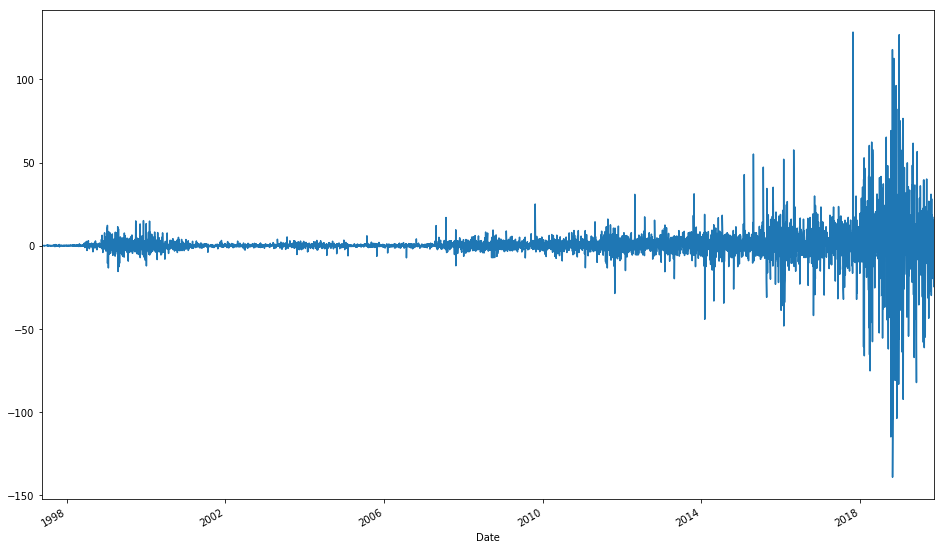

In [5]:
data.set_index('Date')['Close'].diff().plot(figsize=(16, 10))

# Task 1

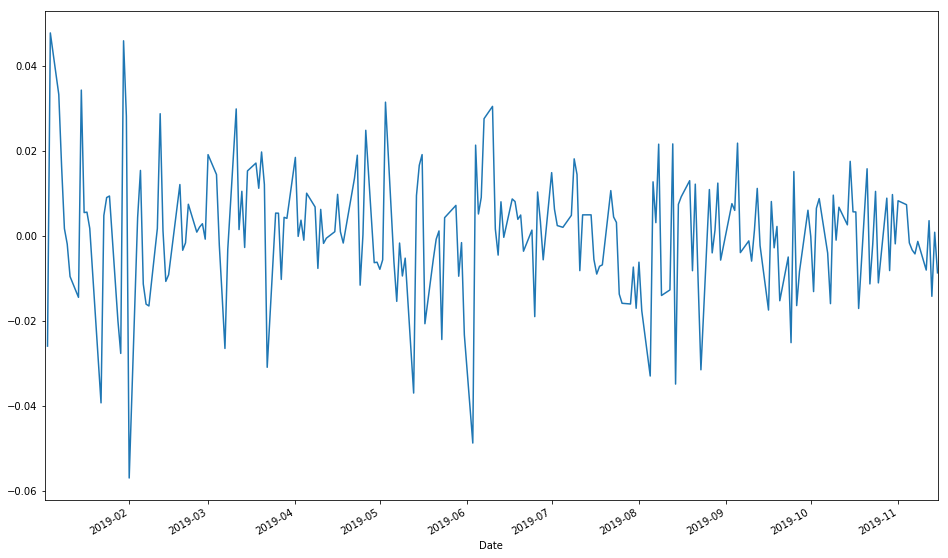

In [6]:
a = data[data['Date'] > '2018-12-31'].set_index('Date')
(a['Close'].diff()/a['Close']).plot(figsize=(16, 10))

In [7]:
from matplotlib import pyplot as plt

In [8]:
from sklearn.metrics import log_loss, f1_score, roc_auc_score

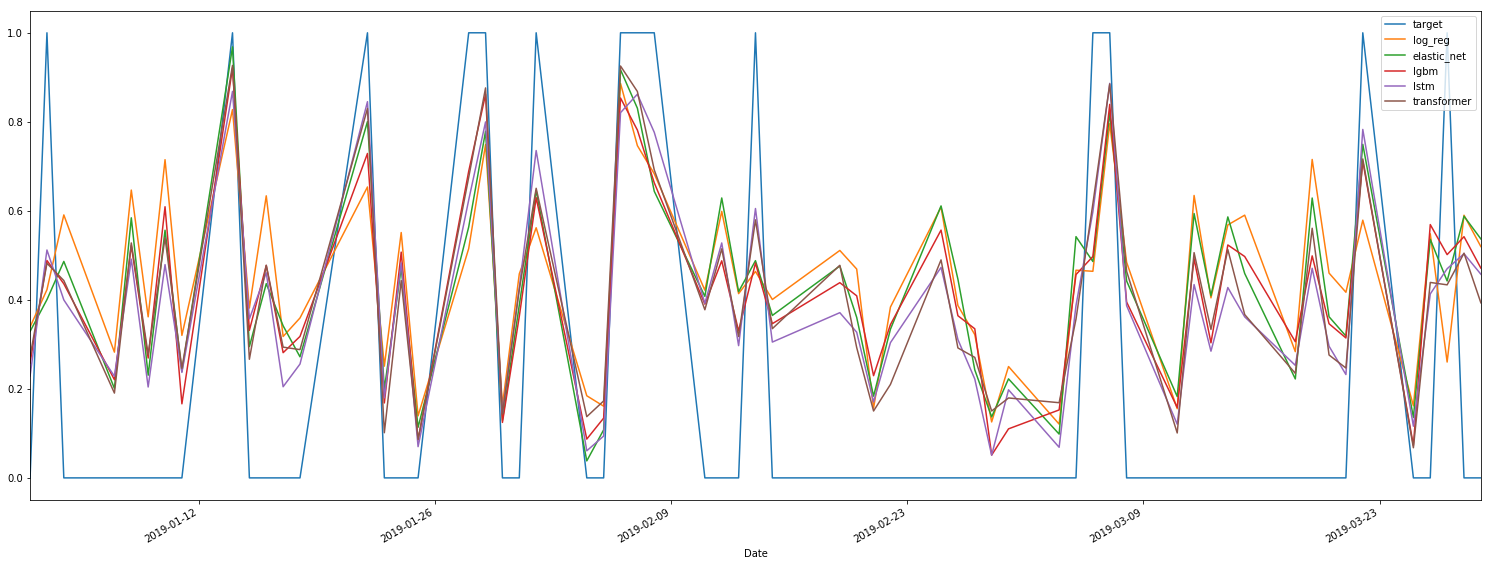

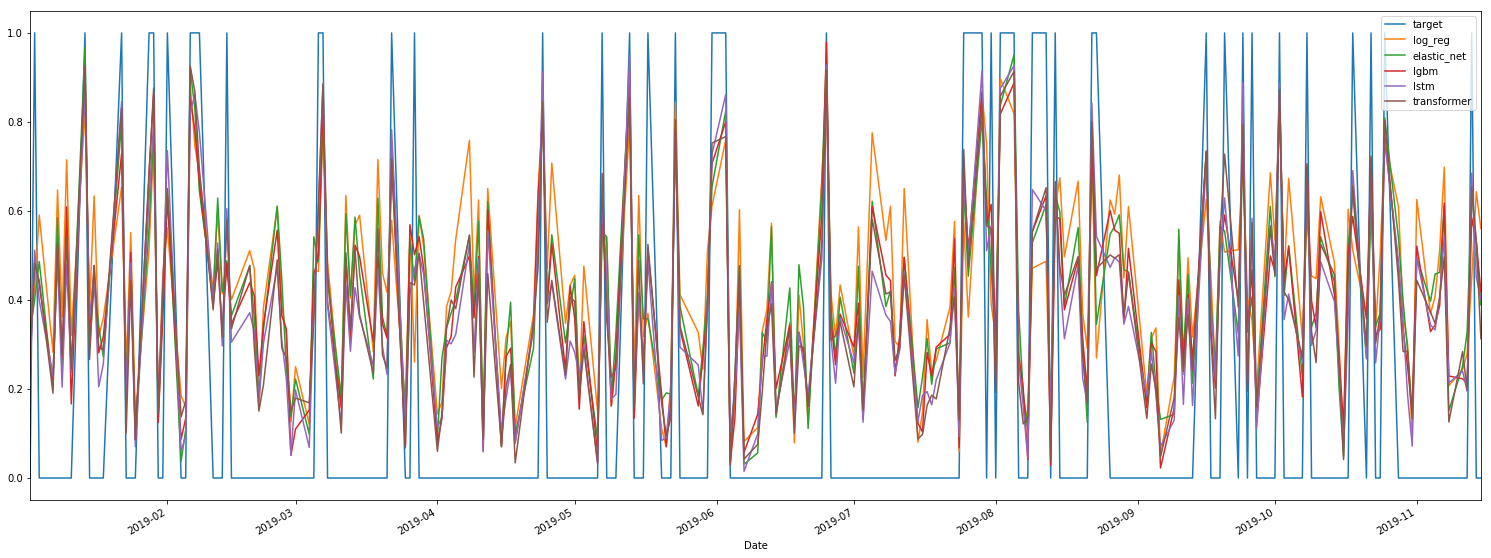

log_reg
log_loss: 0.5387483612398388
roc_auc: 0.8043393529946732


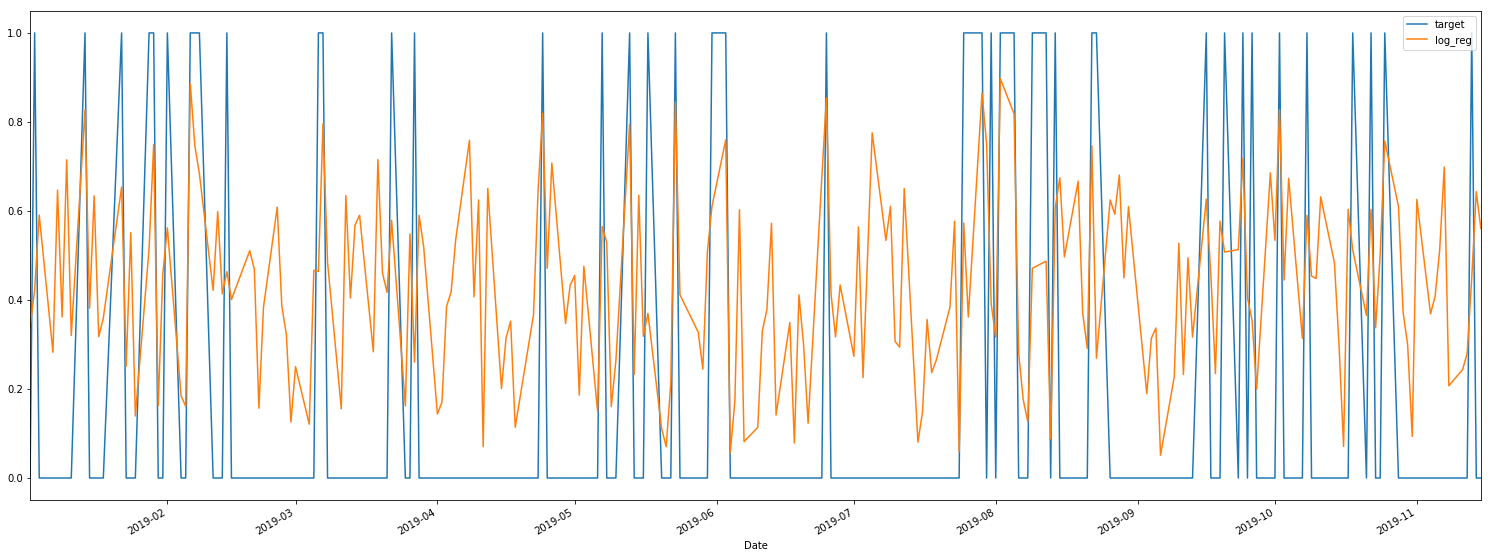

elastic_net
log_loss: 0.44880918136007036
roc_auc: 0.9152916720800313


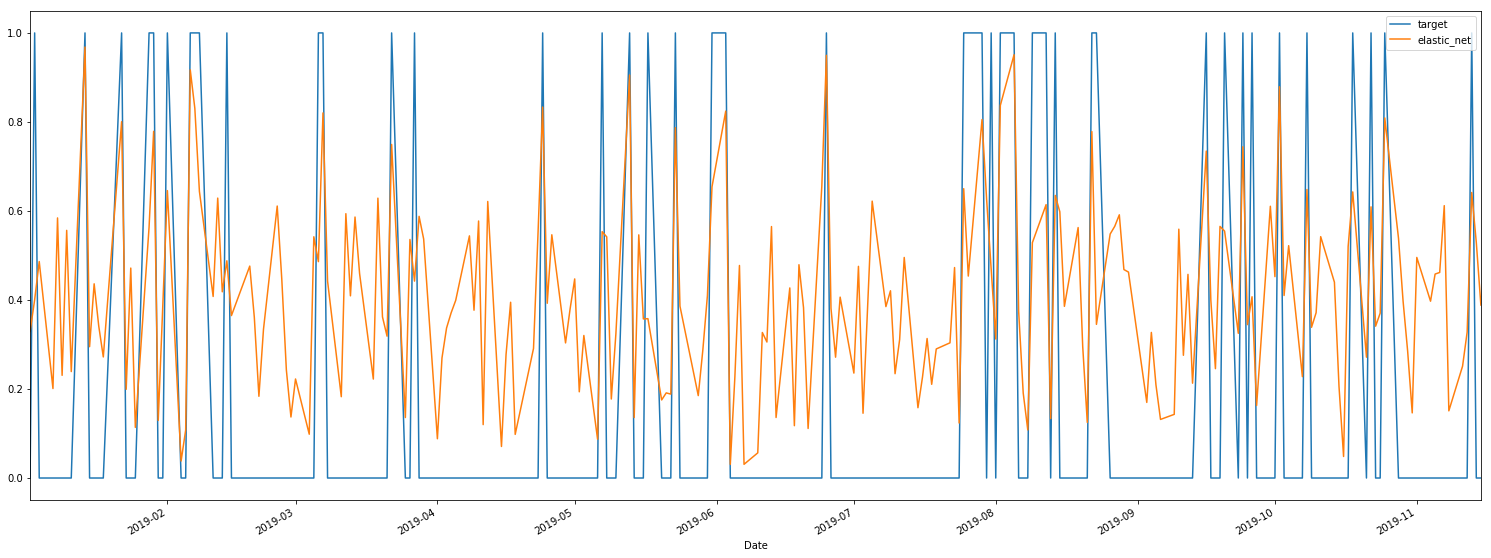

lgbm
log_loss: 0.4099900461432866
roc_auc: 0.9610237754969468


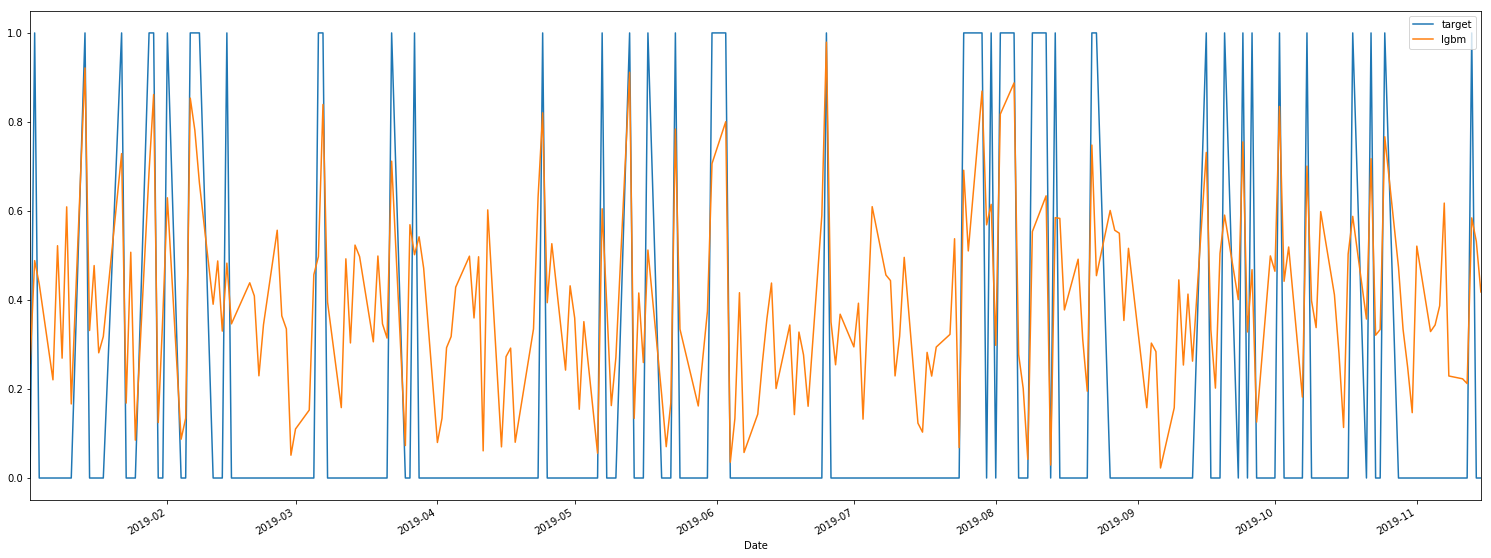

lstm
log_loss: 0.3561975494575405
roc_auc: 0.9927244380927635


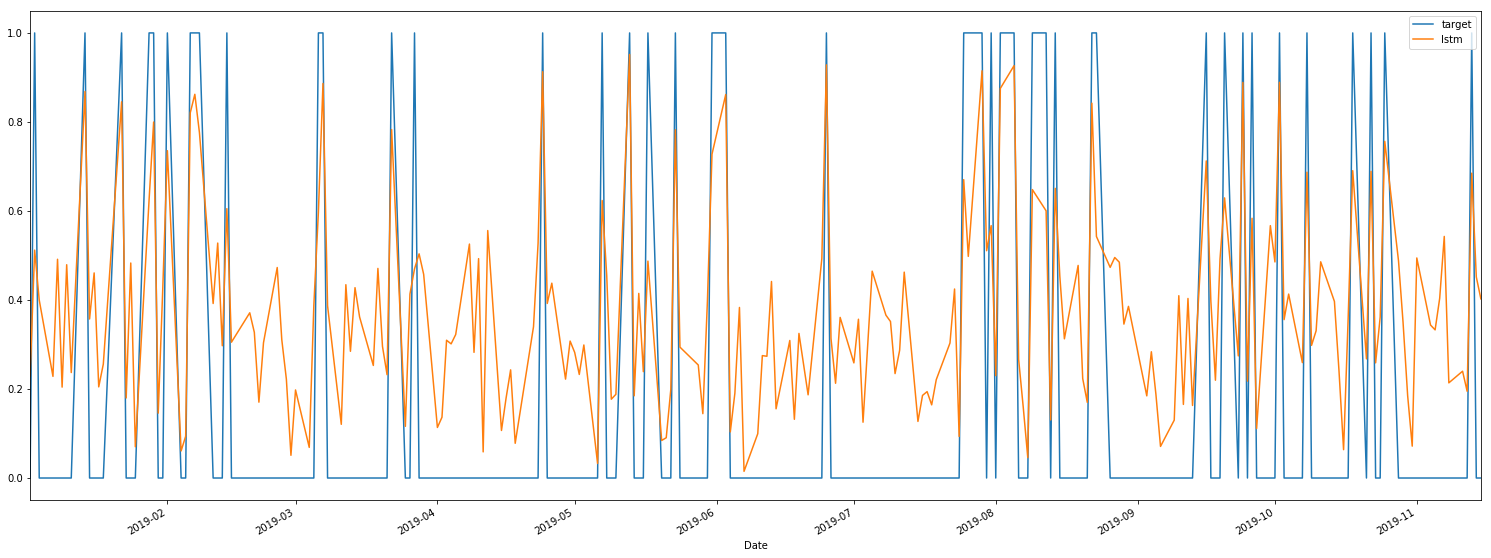

transformer
log_loss: 0.3703629656024053
roc_auc: 0.9824606989736261


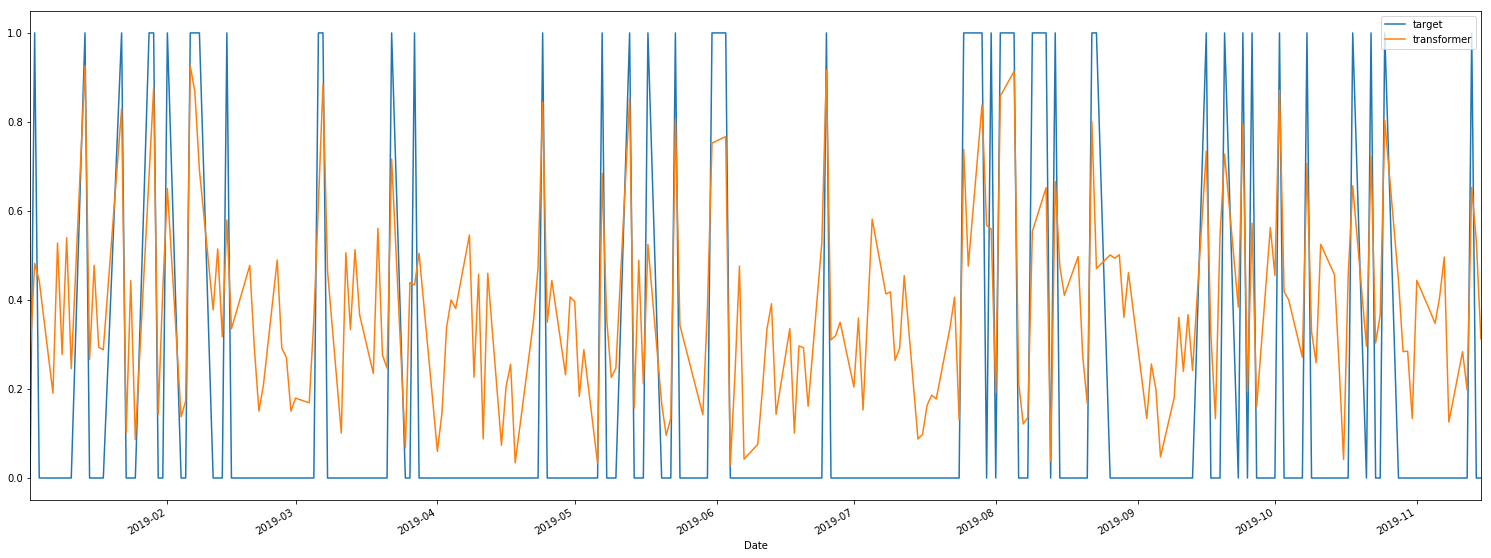

In [9]:
from task1 import get_model_fit_predict
from utils.preprocessing import create_features_and_split

models = get_model_fit_predict
graps = {}
true_target = ((data['Close'].diff()/data['Close']) < -0.01).astype(int).iloc[:-1]
input_data = create_features_and_split(
    data.iloc[:-1], 
    true_target,
    split_date='2018-12-31'
)
for model_name, model_fit_predict in models.items():
    model_predict = model_fit_predict(input_data)
    graps[model_name] = model_predict
    
    
# plot first quarter
first_quarter = true_target.index < '2019-04-01'
true_target[first_quarter].rename('target').plot(figsize=(26, 10), legend=True)
for k,v in graps.items():
    v[first_quarter].rename(k).plot(legend=True)
plt.show()    

# plot all period
true_target.rename('target').plot(figsize=(26, 10), legend=True)
for k,v in graps.items():
    v.rename(k).plot(legend=True)
plt.show()  

# plot separately
for k,v in graps.items():
    print(k)
    print(f'log_loss: {log_loss(true_target, v)}')
    print(f'roc_auc: {roc_auc_score(true_target, v)}')
    true_target.rename('target').plot(figsize=(26, 10), legend=True)
    v.rename(k).plot(legend=True)
    plt.show()
    
merged_predicts = pd.DataFrame({'target': true_target.tolist()}, index=true_target.index)
for k, v in graps.items():
    merged_predicts[k] = v
merged_predicts.to_csv('task1_predicts.csv')

In [10]:
pd.DataFrame(np.array([v for k, v in graps.items()]).T, columns=graps.keys()).corr()

log_reg  elastic_net      lgbm      lstm  transformer
log_reg      1.000000     0.930286  0.919001  0.868379     0.885439
elastic_net  0.930286     1.000000  0.959471  0.944674     0.945966
lgbm         0.919001     0.959471  1.000000  0.960389     0.964408
lstm         0.868379     0.944674  0.960389  1.000000     0.970526
transformer  0.885439     0.945966  0.964408  0.970526     1.000000

# Task 2

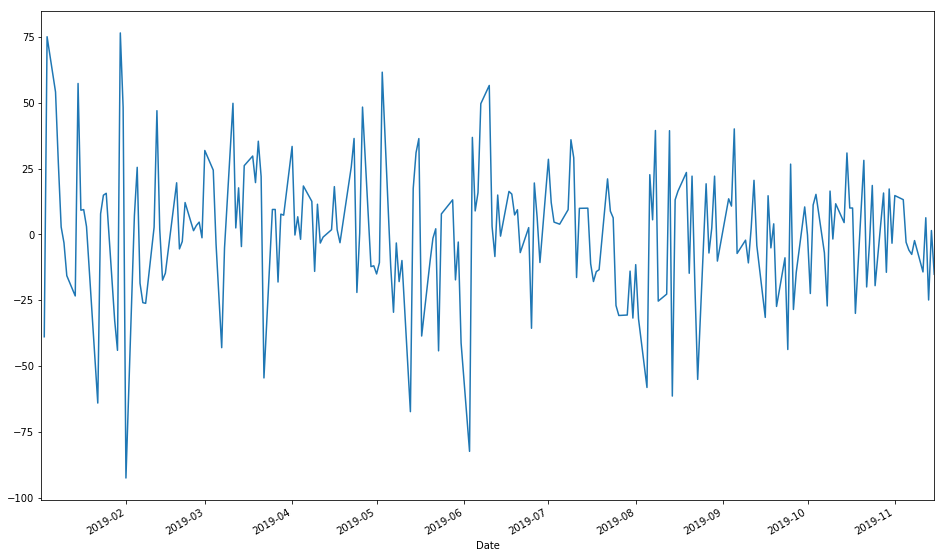

In [11]:
a = data[data['Date'] > '2018-12-31'].set_index('Date')
a['Close'].diff().plot(figsize=(16, 10))

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

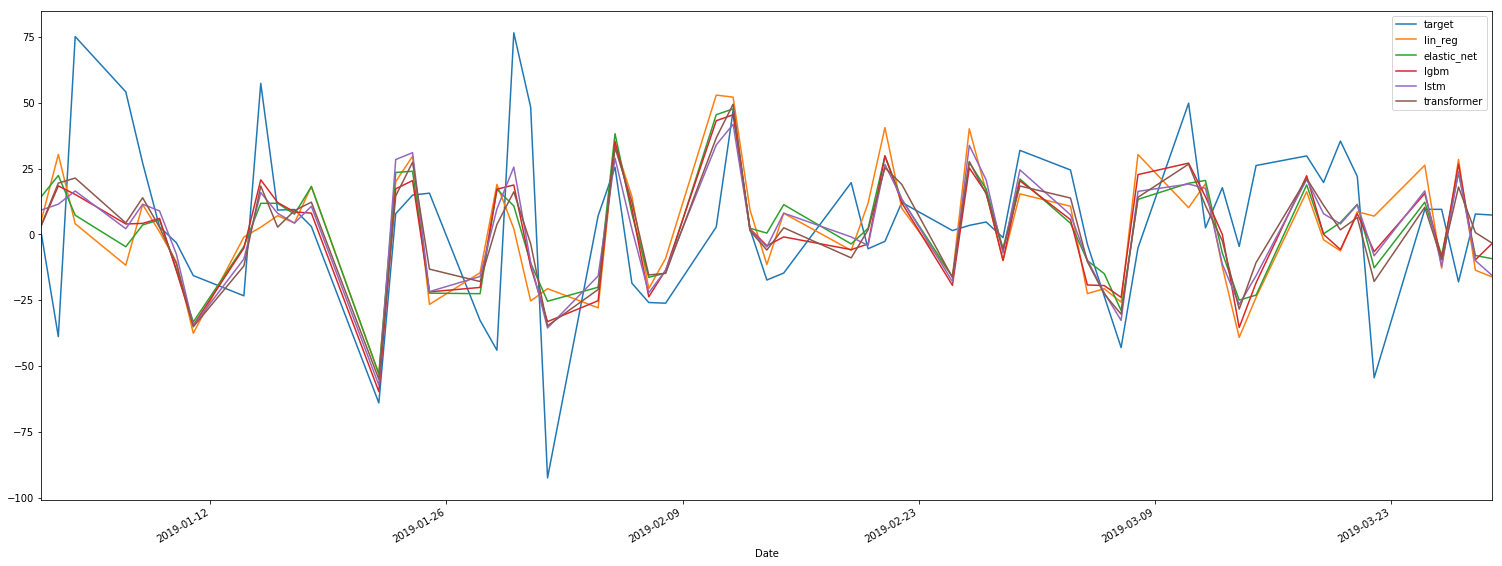

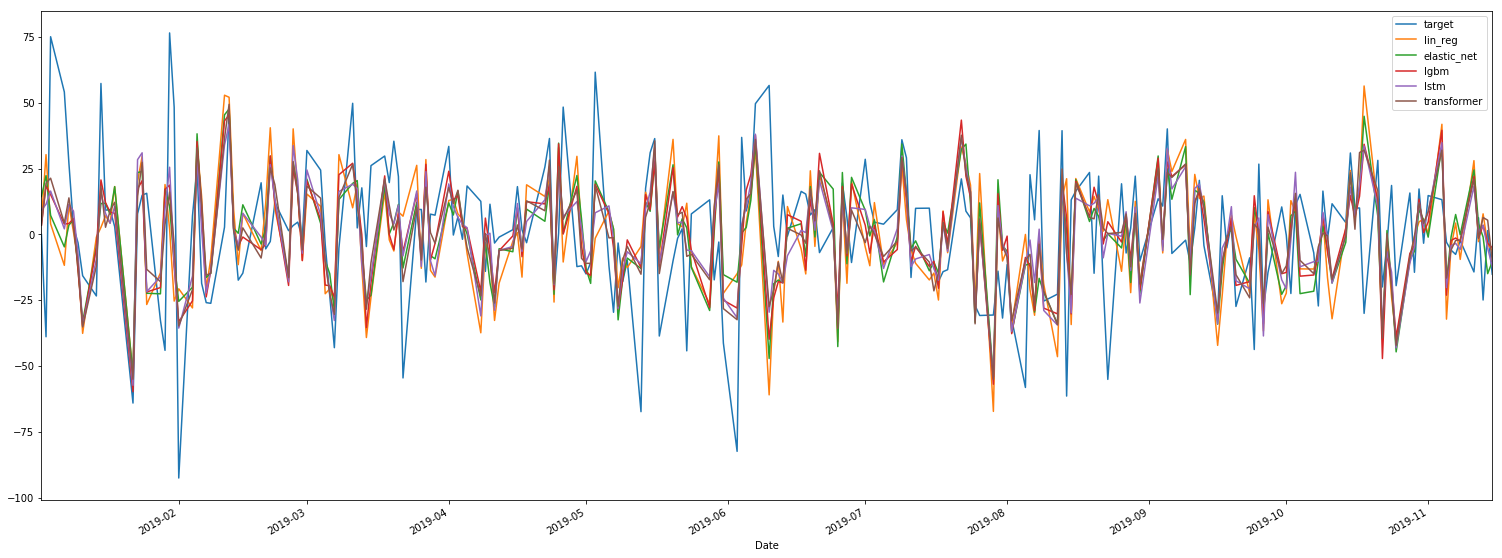

lin_reg
mae: 23.404736285467603
mse: 926.2699078073928


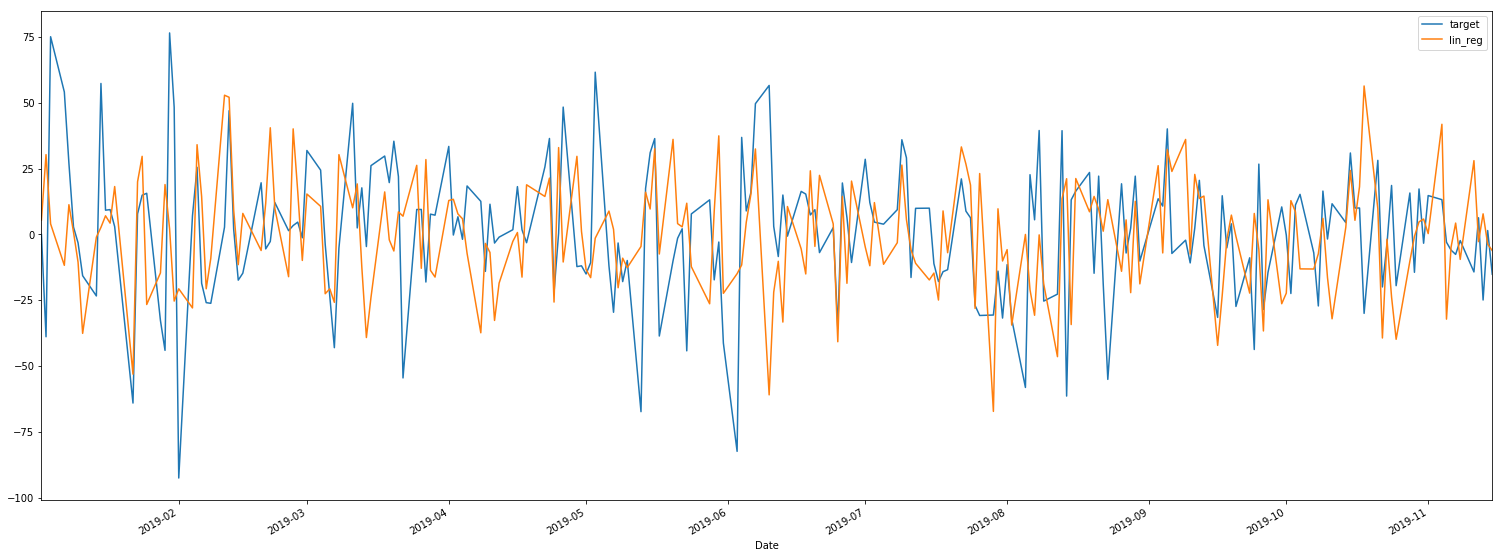

elastic_net
mae: 20.434731393512635
mse: 699.015513207355


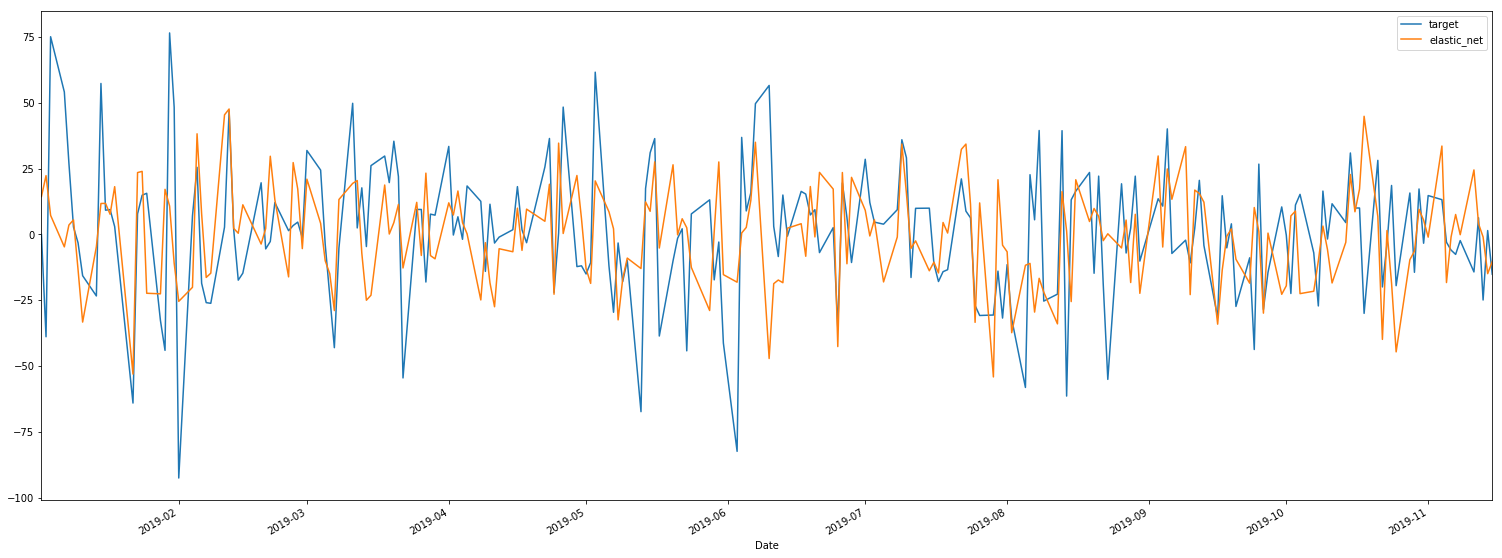

lgbm
mae: 19.273044127061883
mse: 639.2775675372465


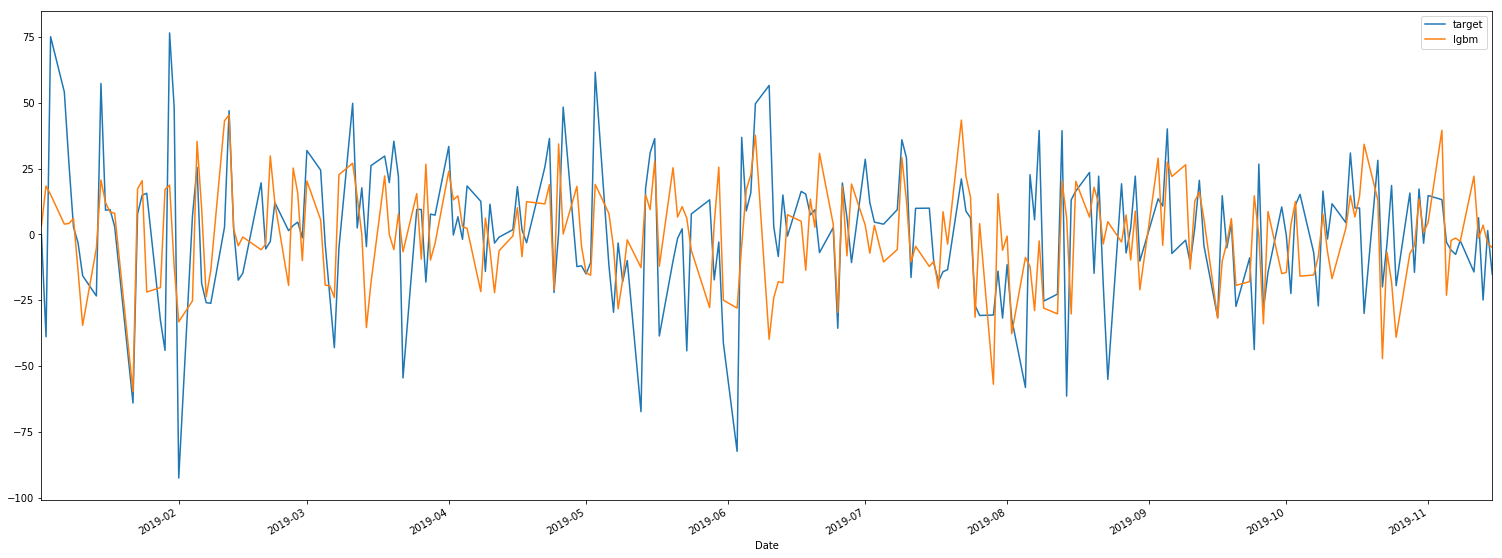

lstm
mae: 17.86129876935322
mse: 542.4347790782867


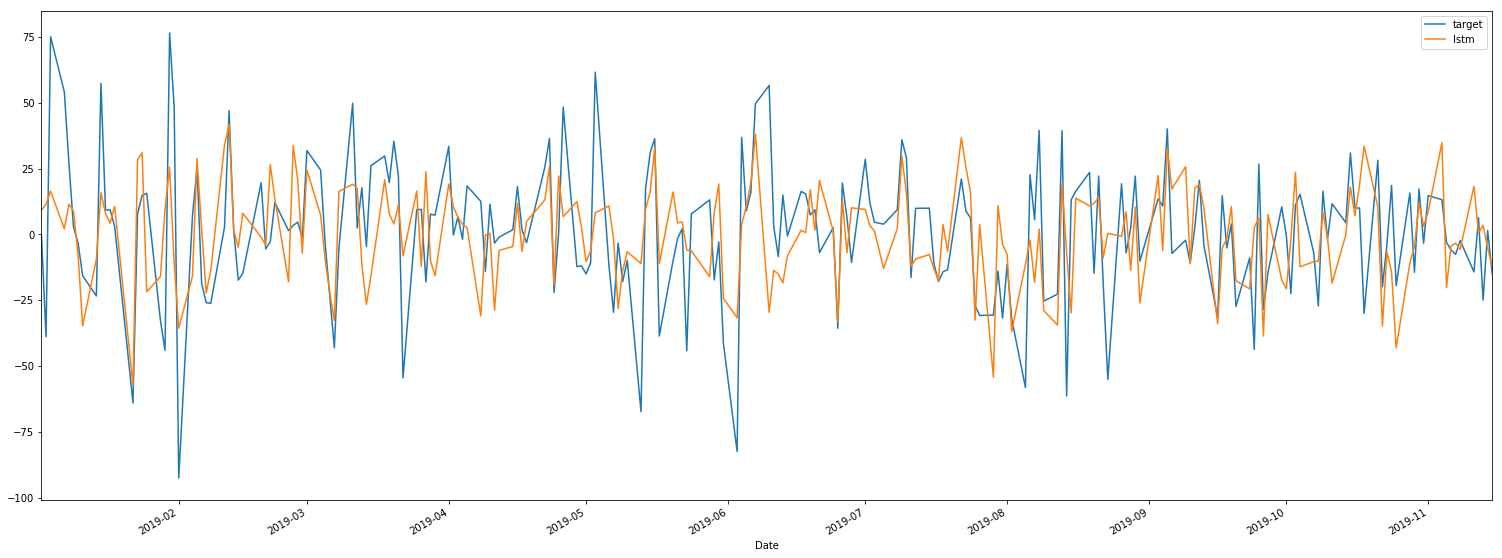

transformer
mae: 17.82998001346781
mse: 532.7733066126699


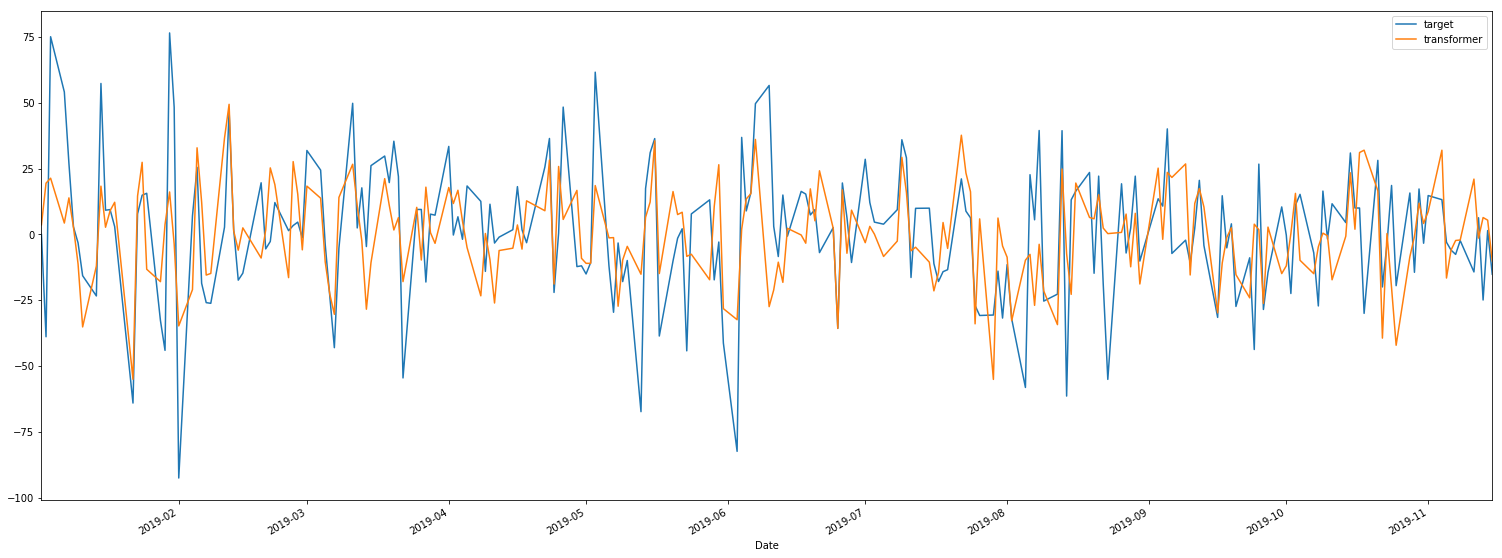

In [13]:
from task2 import get_model_fit_predict
from utils.preprocessing import create_features_and_split

models = get_model_fit_predict
graps = {}
true_target = data['Close'].diff().iloc[:-1]
input_data = create_features_and_split(
    data.iloc[:-1], 
    true_target,
    split_date='2018-12-31'
)
for model_name, model_fit_predict in models.items():
    model_predict = model_fit_predict(input_data)
    graps[model_name] = model_predict
    
# plot first quarter
first_quarter = true_target.index < '2019-04-01'
true_target[first_quarter].rename('target').plot(figsize=(26, 10), legend=True)
for k,v in graps.items():
    v[first_quarter].rename(k).plot(legend=True)
plt.show()    

# plot all period
true_target.rename('target').plot(figsize=(26, 10), legend=True)
for k,v in graps.items():
    v.rename(k).plot(legend=True)
plt.show()  

# plot separately
for k,v in graps.items():
    print(k)
    print(f'mae: {mean_absolute_error(true_target, v)}')
    print(f'mse: {mean_squared_error(true_target, v)}')
    true_target.rename('target').plot(figsize=(26, 10), legend=True)
    v.rename(k).plot(legend=True)
    plt.show()
    
merged_predicts = pd.DataFrame({'target': true_target.tolist()}, index=true_target.index)
for k, v in graps.items():
    merged_predicts[k] = v
merged_predicts.to_csv('task2_predicts.csv')

In [14]:
pd.DataFrame(np.array([v for k, v in graps.items()]).T, columns=graps.keys()).corr()

lin_reg  elastic_net      lgbm      lstm  transformer
lin_reg      1.000000     0.935845  0.930887  0.902945     0.898547
elastic_net  0.935845     1.000000  0.957477  0.941380     0.939876
lgbm         0.930887     0.957477  1.000000  0.956007     0.958323
lstm         0.902945     0.941380  0.956007  1.000000     0.960738
transformer  0.898547     0.939876  0.958323  0.960738     1.000000

# Task 3

In [15]:
a = data[data['Date'] > '2018-12-31'].set_index('Date')
#a['Close'].diff().plot(figsize=(16, 10))

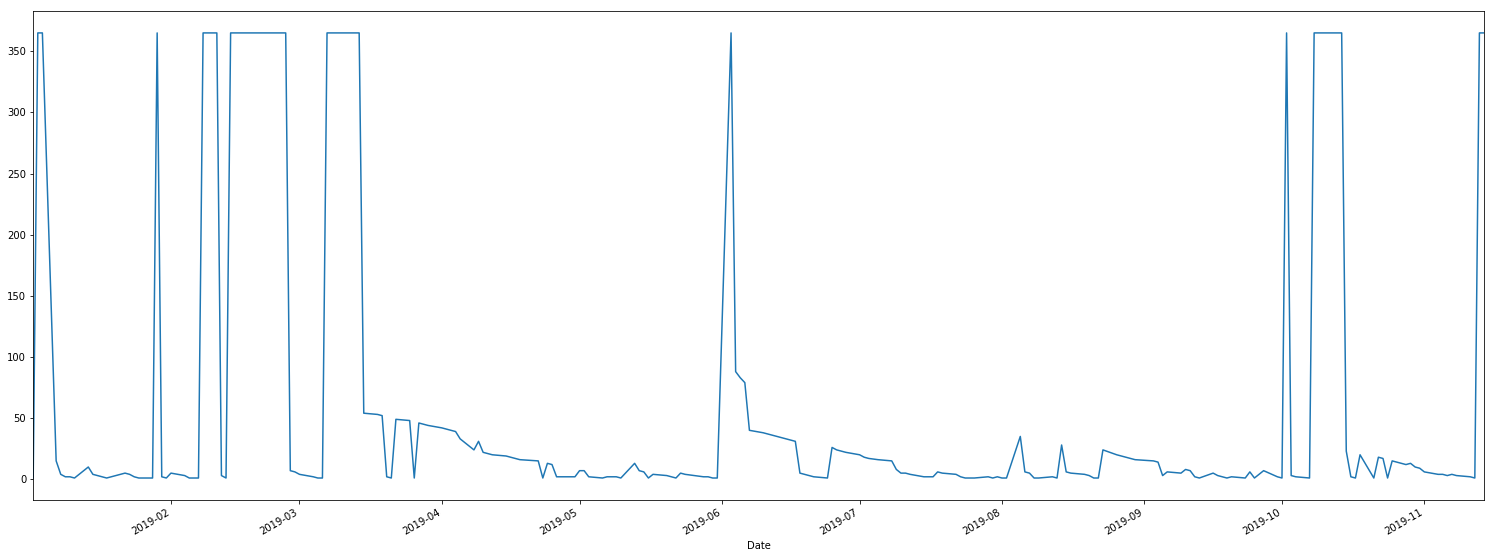

In [16]:
taregt = {i:365 for i in range(a['Close'].shape[0]-1)}

for i,el in enumerate(a['Close'].iloc[:-1]):
    for j, next_el in enumerate(a['Close'][i:]):
        if next_el/el < 0.99:
            taregt[i] = j
            break


true_target = pd.Series(list(taregt.values()), index= a.index[:-1])
true_target.plot(figsize=(26, 10))

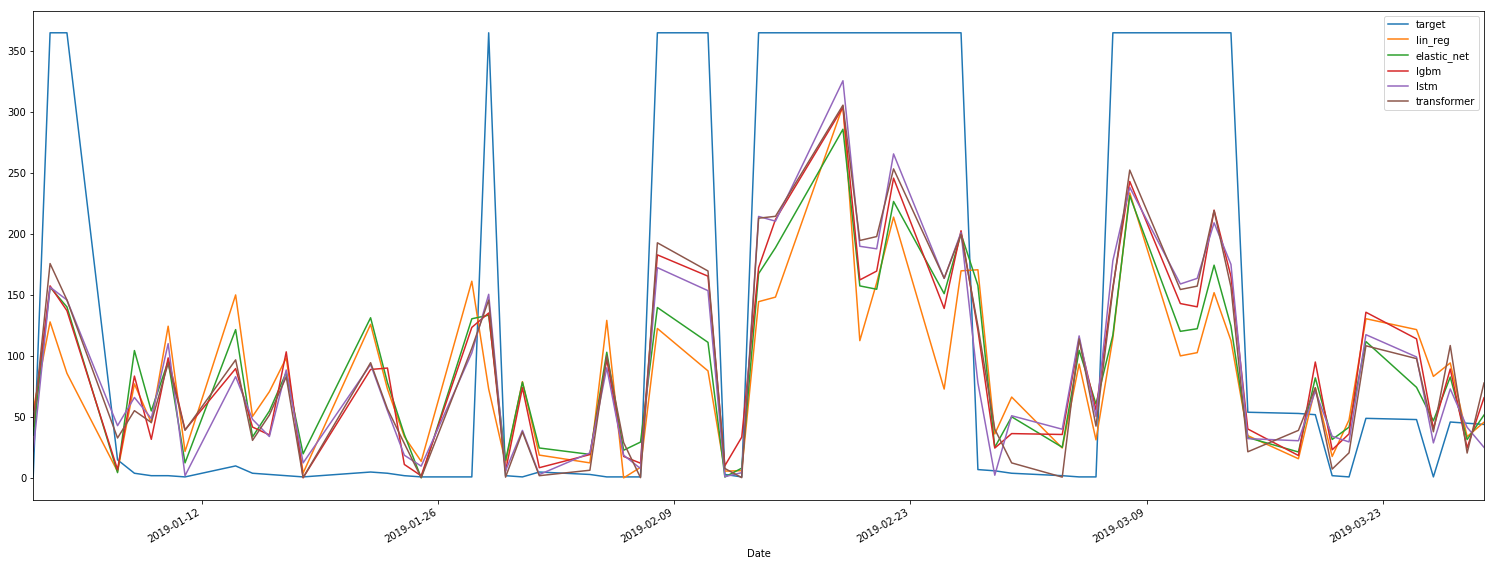

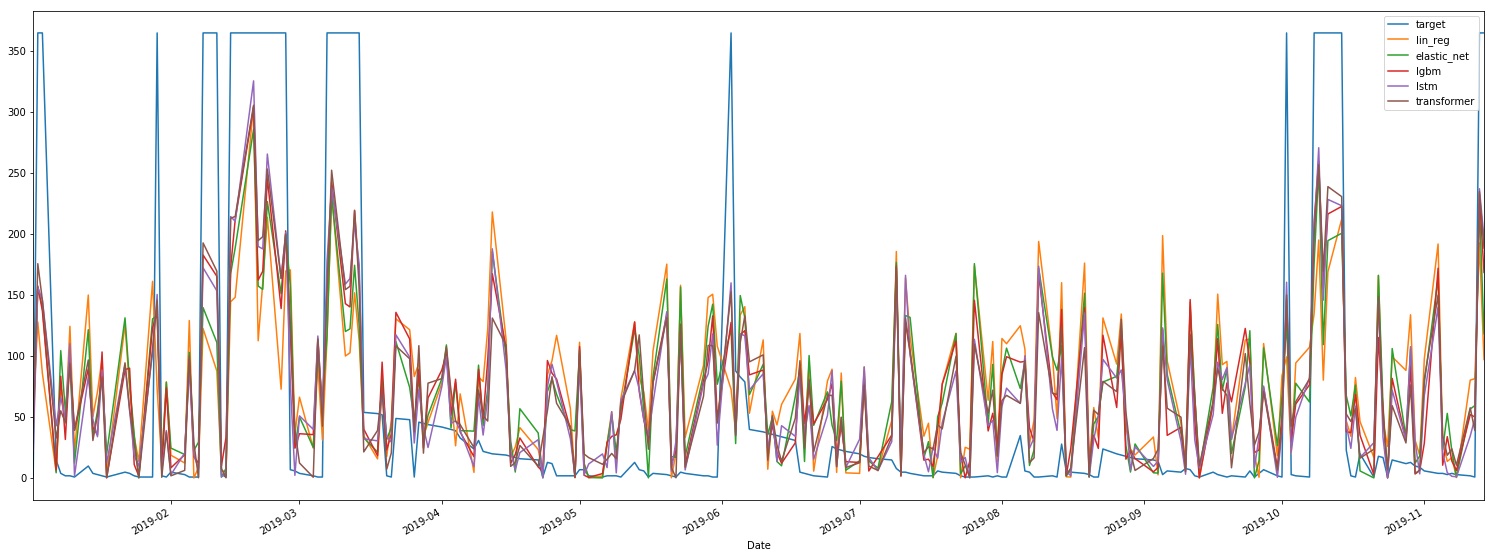

lin_reg
mae: 79.7572169366116
mse: 12042.514962123163


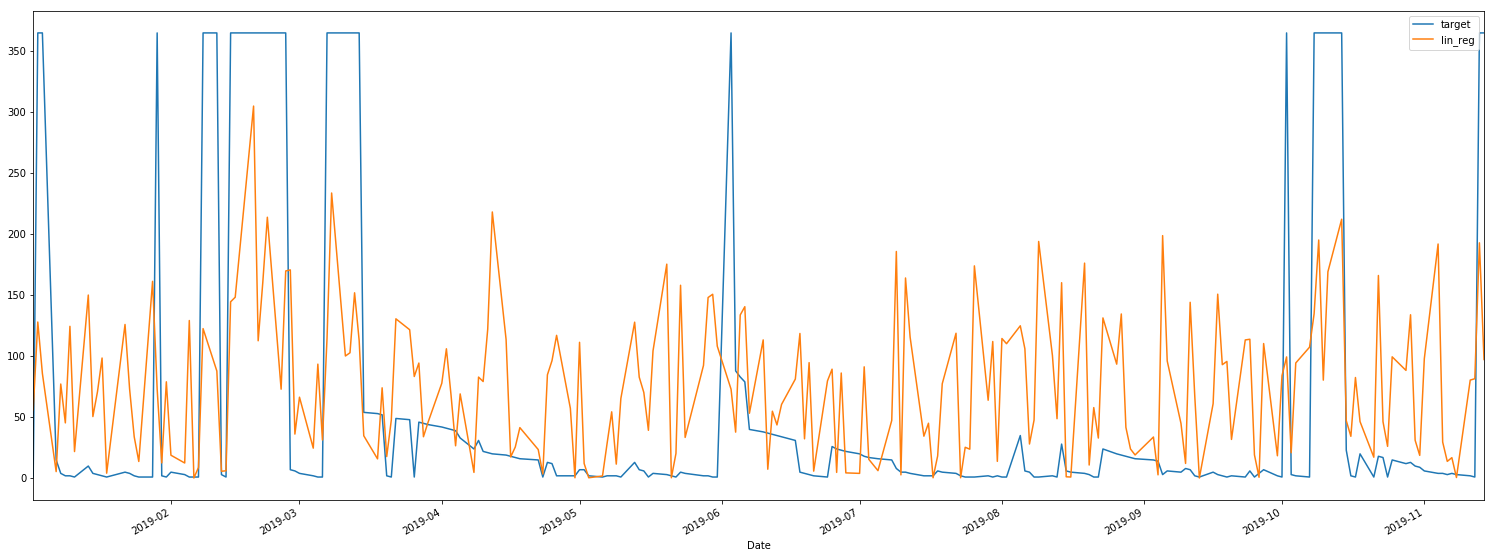

elastic_net
mae: 70.28047618419525
mse: 9354.743223342857


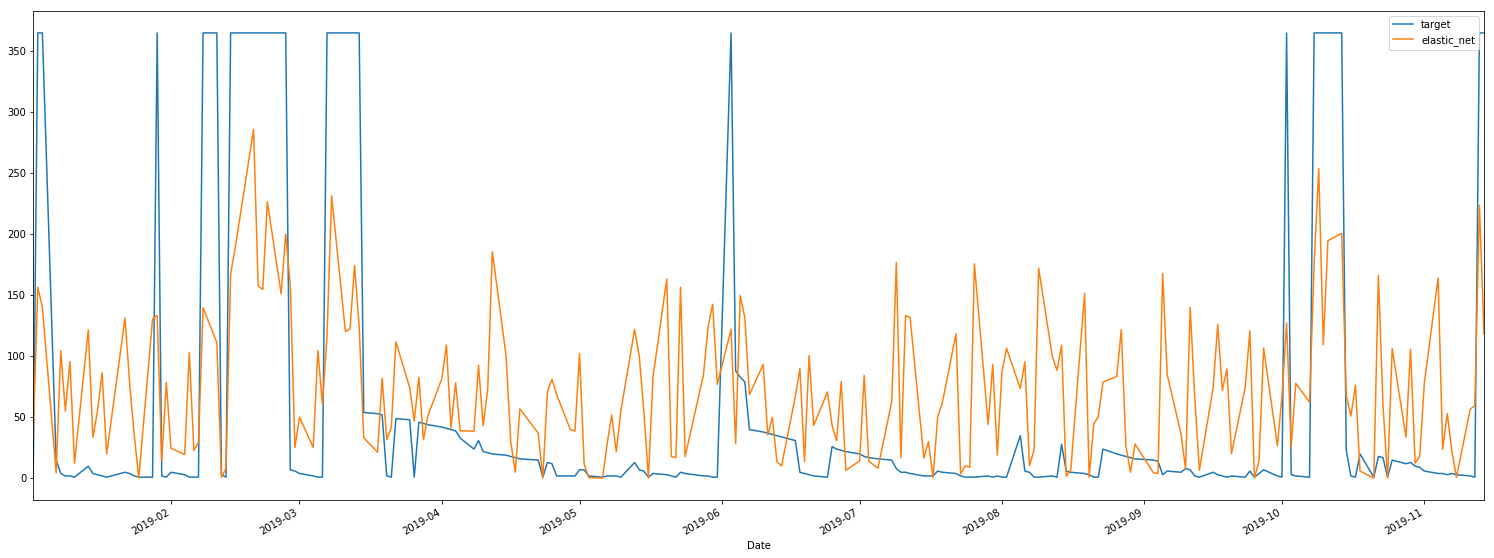

lgbm
mae: 63.65648906627621
mse: 7664.297257604332


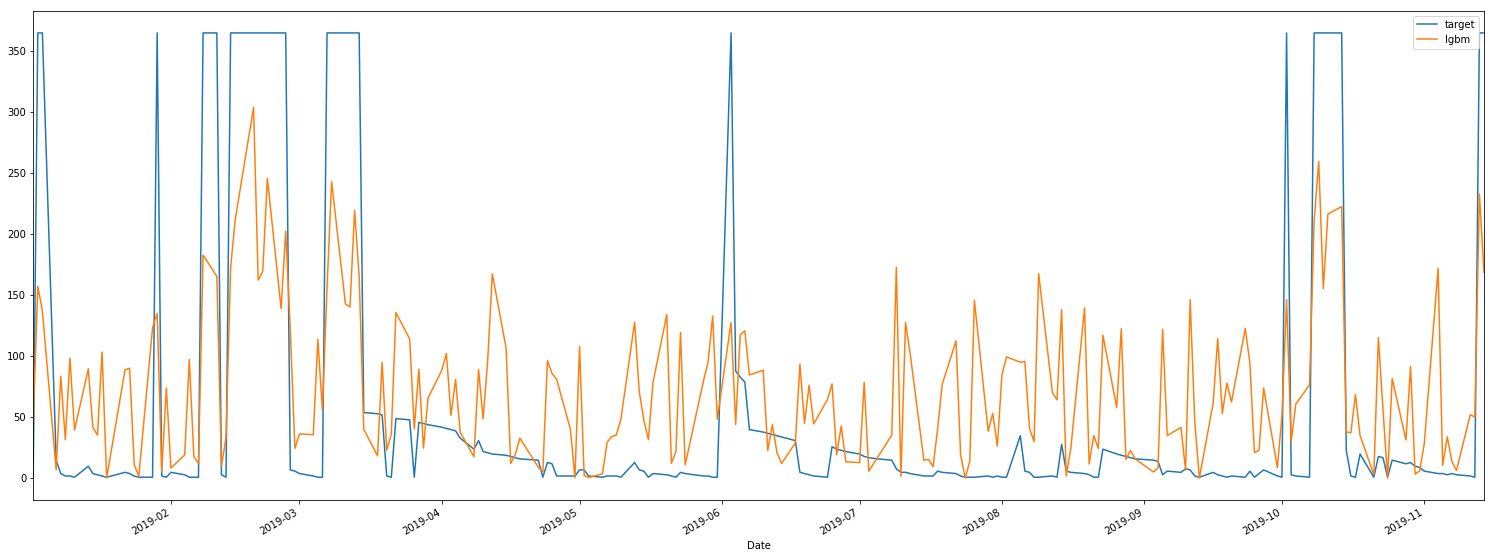

lstm
mae: 57.92553930559797
mse: 6636.388262860072


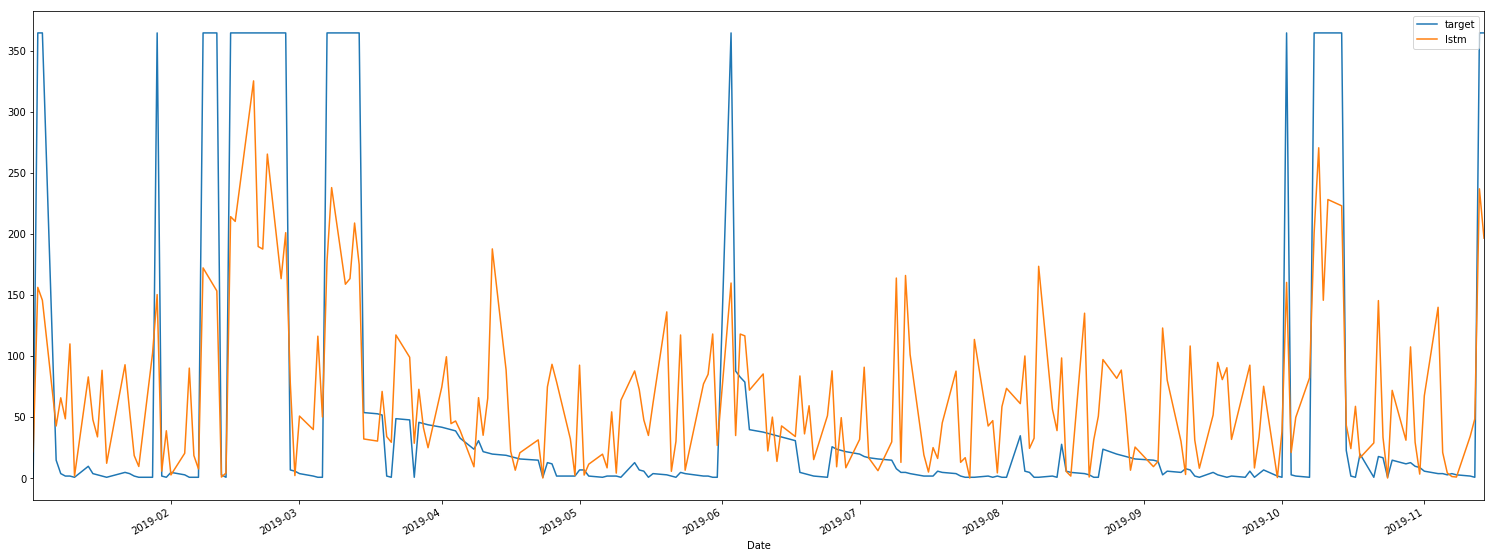

transformer
mae: 59.63527028305897
mse: 6669.694709903337


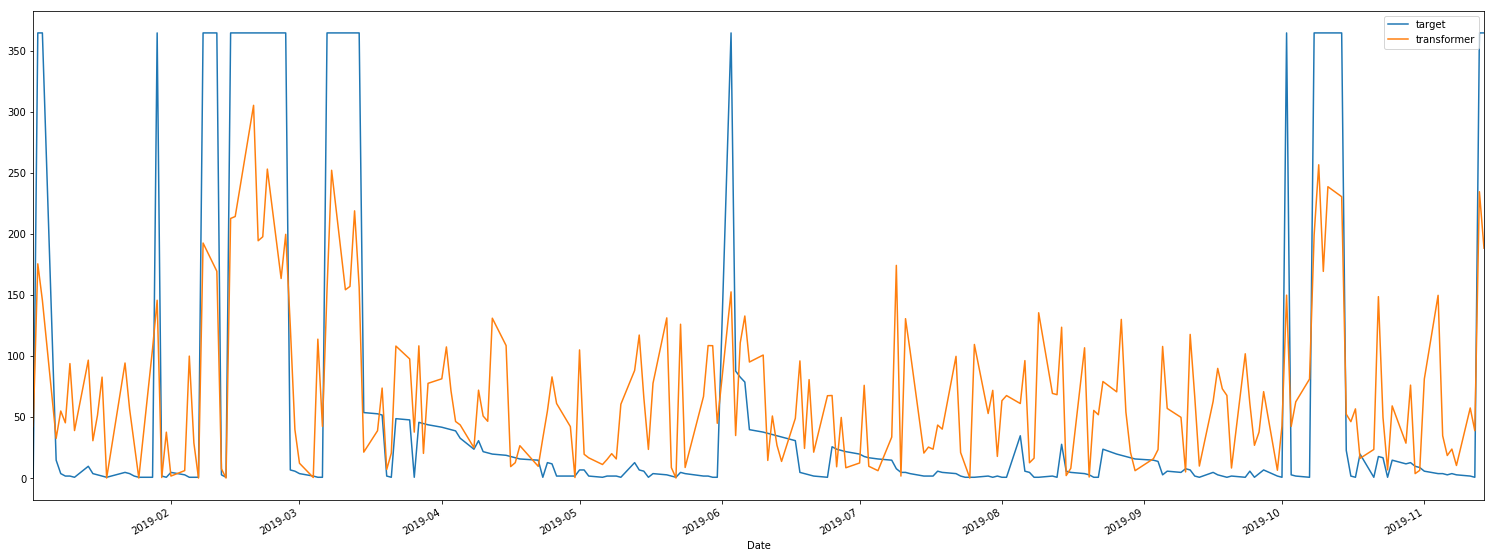

In [17]:
from task3 import get_model_fit_predict
from utils.preprocessing import create_features_and_split

models = get_model_fit_predict
graps = {}
true_target = true_target
input_data = create_features_and_split(
    data.iloc[:-1], 
    true_target,
    split_date='2018-12-31'
)
for model_name, model_fit_predict in models.items():
    model_predict = model_fit_predict(input_data)
    graps[model_name] = model_predict
    
# plot first quarter
first_quarter = true_target.index < '2019-04-01'
true_target[first_quarter].rename('target').plot(figsize=(26, 10), legend=True)
for k,v in graps.items():
    v[first_quarter].rename(k).plot(legend=True)
plt.show()    

# plot all period
true_target.rename('target').plot(figsize=(26, 10), legend=True)
for k,v in graps.items():
    v.rename(k).plot(legend=True)
plt.show()  

# plot separately
for k,v in graps.items():
    print(k)
    print(f'mae: {mean_absolute_error(true_target, v)}')
    print(f'mse: {mean_squared_error(true_target, v)}')
    true_target.rename('target').plot(figsize=(26, 10), legend=True)
    v.rename(k).plot(legend=True)
    plt.show()
    
merged_predicts = pd.DataFrame({'target': true_target.tolist()}, index=true_target.index)
for k, v in graps.items():
    merged_predicts[k] = v
merged_predicts.to_csv('task3_predicts.csv')

In [18]:
pd.DataFrame(np.array([v for k, v in graps.items()]).T, columns=graps.keys()).corr()

lin_reg  elastic_net      lgbm      lstm  transformer
lin_reg      1.000000     0.922863  0.882515  0.851889     0.843295
elastic_net  0.922863     1.000000  0.944837  0.927074     0.927682
lgbm         0.882515     0.944837  1.000000  0.959332     0.958998
lstm         0.851889     0.927074  0.959332  1.000000     0.964283
transformer  0.843295     0.927682  0.958998  0.964283     1.000000